# Pymaceuticals Inc.
---

### Analysis

- The sample size is evenly split between male and female. It almost reaches a 50-50 split. It would be benefitial to check if the results between male and female follow a same tendency.

- We can observe a strong positive correlation between 'Mouse Weight' and the 'Average Tumor Volume (0.84 correlation). This means there more a mouse weights, the bigger the tumor might be in said mouse.

- The box plot helps us see how Capomulin and Ramicane have a higher success rate versus Infubinol and Ceftamin.


 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [90]:
# Checking the number of mice.
num_of_mice = merged_df["Mouse ID"].nunique()
num_of_mice

249

In [91]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice_id

array(['g989'], dtype=object)

In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [94]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = cleaned_df["Mouse ID"].nunique()
num_mice_clean

248

## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
var = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
std = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

summary_tumor = pd.DataFrame(
    {"Mean Tumor Volume":mean, 
    "Median Tumor Volume":median, 
    "Tumor Volume Variance":var, 
    "Tumor Volume Std. Dev.":std, 
    "Tumor Volume Std. Err.":sem})

summary_tumor

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_tumor_agg = cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

summary_tumor_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observeed Mouse Timepoints')

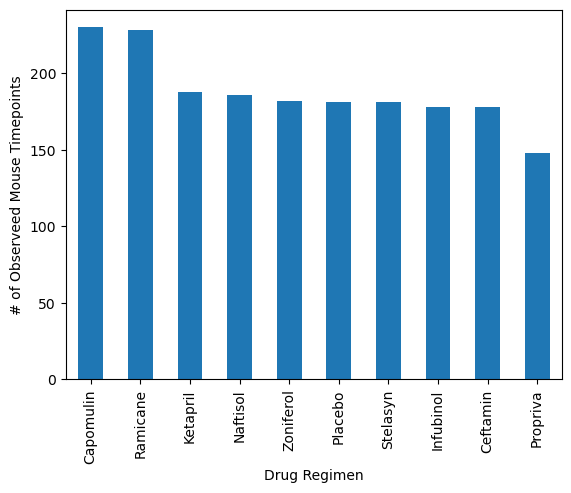

In [97]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = cleaned_df["Drug Regimen"].value_counts()
plot_bar = total_rows.plot.bar(color= "tab:blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observeed Mouse Timepoints")


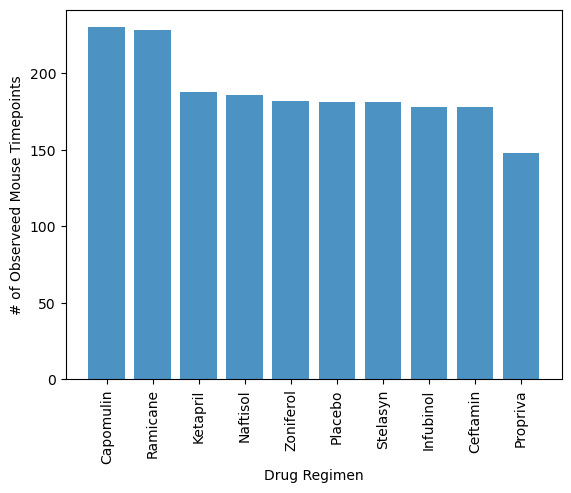

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis =total_rows.index.values
y_axis = total_rows.values
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observeed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()


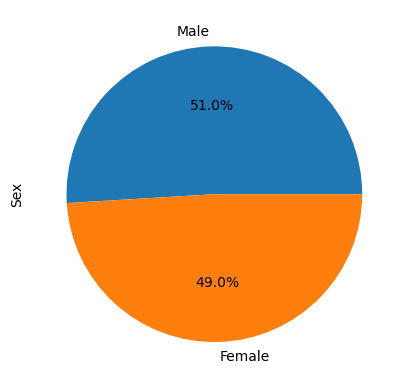

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = cleaned_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


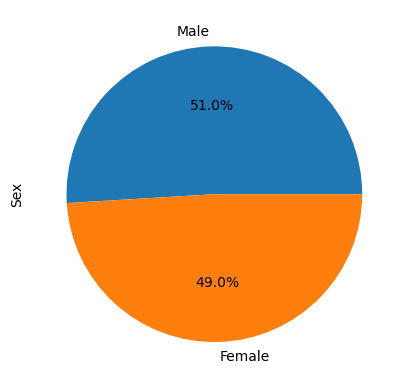

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
g_labels = ['Male', 'Female']
gender_values = cleaned_df["Sex"].value_counts()
plt.pie(gender_values, labels=g_labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capo_df = cleaned_df.loc[cleaned_df["Drug Regimen"]== "Capomulin"]
Rami_df = cleaned_df.loc[cleaned_df["Drug Regimen"]== "Ramicane"]
Infu_df = cleaned_df.loc[cleaned_df["Drug Regimen"]== "Infubinol"]
Ceft_df = cleaned_df.loc[cleaned_df["Drug Regimen"]== "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
Capo_last = Capo_df.groupby("Mouse ID").max()["Timepoint"]
Rami_last = Rami_df.groupby("Mouse ID").max()["Timepoint"]
Infu_last = Infu_df.groupby("Mouse ID").max()["Timepoint"]
Ceft_last = Ceft_df.groupby("Mouse ID").max()["Timepoint"]

Capo_vol = pd.DataFrame(Capo_last)
Rami_vol = pd.DataFrame(Rami_last)
Infu_vol = pd.DataFrame(Infu_last)
Ceft_vol = pd.DataFrame(Ceft_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capo_merge = Capo_vol.merge(cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
Rami_merge = Rami_vol.merge(cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
Infu_merge = Infu_vol.merge(cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
Ceft_merge = Ceft_vol.merge(cleaned_df, on=("Mouse ID", "Timepoint"), how="left")





In [102]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

Capo_q = Capo_merge["Tumor Volume (mm3)"]
C_quartiles = Capo_q.quantile([.25,.5,.75])
C_lowerq = C_quartiles[0.25]
C_upperq = C_quartiles[0.75]
C_IQR = C_upperq - C_lowerq
C_lowbound = C_lowerq - (1.5*C_IQR)
C_upbound = C_upperq + (1.5*C_IQR)

print(f"Values below {C_lowbound} could be outliers.")
print(f"Values above {C_upbound} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [103]:
Rami_q = Rami_merge["Tumor Volume (mm3)"]
R_quartiles = Rami_q.quantile([.25,.5,.75])
R_lowerq = R_quartiles[0.25]
R_upperq = R_quartiles[0.75]
R_IQR = R_upperq - R_lowerq
R_lowbound = R_lowerq - (1.5*R_IQR)
R_upbound = R_upperq + (1.5*R_IQR)

print(f"Values below {R_lowbound} could be outliers.")
print(f"Values above {R_upbound} could be outliers.")

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [104]:
Infu_q = Infu_merge["Tumor Volume (mm3)"]
I_quartiles = Infu_q.quantile([.25,.5,.75])
I_lowerq = I_quartiles[0.25]
I_upperq = I_quartiles[0.75]
I_IQR = I_upperq - I_lowerq
I_lowbound = I_lowerq - (1.5*I_IQR)
I_upbound = I_upperq + (1.5*I_IQR)
print(f"Values below {I_lowbound} could be outliers.")
print(f"Values above {I_upbound} could be outliers.")

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [105]:
Ceft_q = Ceft_merge["Tumor Volume (mm3)"]
Ce_quartiles = Ceft_q.quantile([.25,.5,.75])
Ce_lowerq = Ce_quartiles[0.25]
Ce_upperq = Ce_quartiles[0.75]
Ce_IQR = Ce_upperq - Ce_lowerq
Ce_lowbound = Ce_lowerq - (1.5*Ce_IQR)
Ce_upbound = Ce_upperq + (1.5*Ce_IQR)
print(f"Values below {Ce_lowbound} could be outliers.")
print(f"Values above {Ce_upbound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


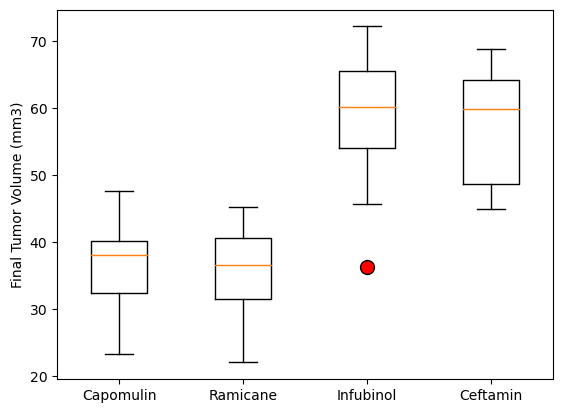

In [106]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot_data = [Capo_q, Rami_q, Infu_q, Ceft_q]
Drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
dot = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
fig1, axes = plt.subplots()
axes.set_ylabel("Final Tumor Volume (mm3)")
axes.boxplot(box_plot_data, labels=Drugs, flierprops = dot)
plt.show()

## Line and Scatter Plots

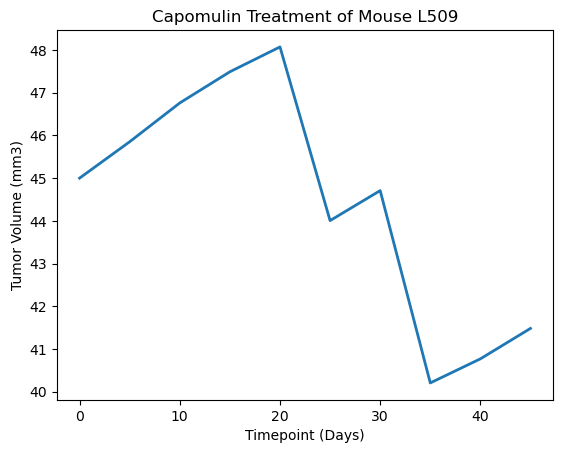

In [107]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = Capo_df.loc[Capo_df["Mouse ID"] == "l509"]
x_axis = line_df["Timepoint"]
t_siz = line_df["Tumor Volume (mm3)"]
fig, ax1 = plt.subplots()
plt.title("Capomulin Treatment of Mouse L509")
plt.plot(x_axis, t_siz, linewidth =2, color="tab:blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

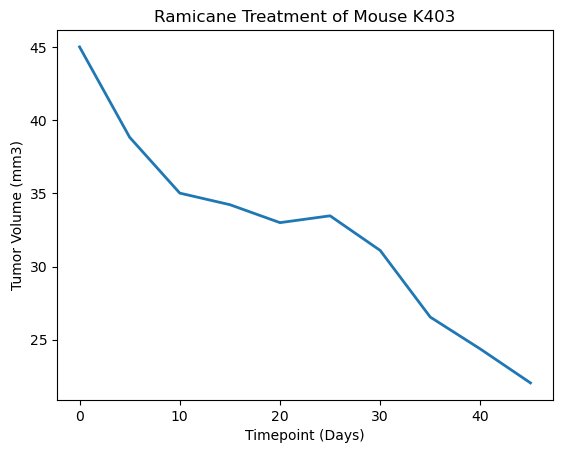

In [108]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Ramicane
line_df = Rami_df.loc[Rami_df["Mouse ID"] == "k403"]
x_axis = line_df["Timepoint"]
t_siz = line_df["Tumor Volume (mm3)"]
fig, ax1 = plt.subplots()
plt.title("Ramicane Treatment of Mouse K403")
plt.plot(x_axis, t_siz, linewidth =2, color="tab:blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

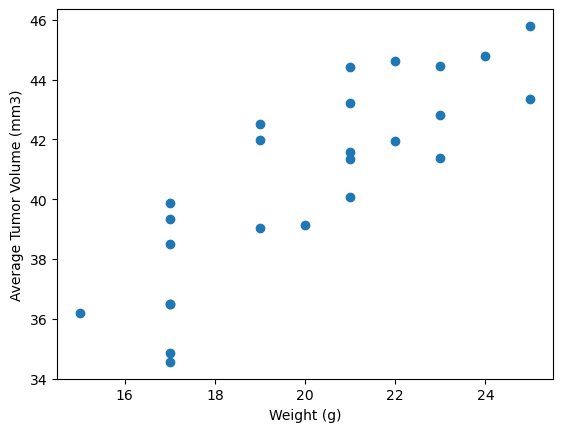

In [109]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capo_vol = Capo_df.groupby(["Mouse ID"]).mean(numeric_only=True)
plt.scatter(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"], color = "tab:blue")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


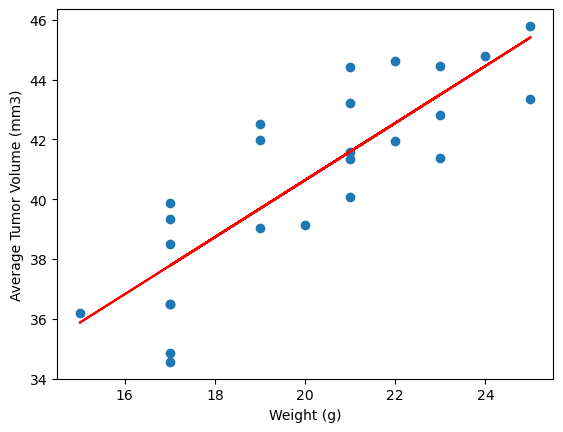

In [112]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"])
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Wm = avg_capo_vol["Weight (g)"]
AVT = avg_capo_vol["Tumor Volume (mm3)"]
(AVT_slope, AVT_int, AVT_r, AVT_p, AVT_std_err)= linregress(Wm, AVT)
linregression = AVT_slope* Wm + AVT_int

plt.scatter(Wm, AVT, marker="o", color="tab:blue")
plt.plot(Wm, linregression, color="r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')
plt.show()